# SPRAWOZDANIE 1
**ANALIZA DANYCH ANKIETOWYCH, SEMESTR LETNI 2024/2025**

**AMELIA BIEDA I BARTŁOMIEJ MIELCARZ**

## Część I
**Zadanie 1.**
Celem zadania było wykonanie ośmiu kroków: 
1. wczytanie danych z ankiety i przygotowanie ich do analizy

In [153]:
import pandas as pd
from statsmodels.graphics.mosaicplot import mosaic
import altair as alt
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt
from scipy.stats import beta
import numpy as np
import random

In [154]:
sciezka = open(r"ankieta.csv")
ankieta = pd.read_csv(sciezka, sep=";", encoding="Latin2")
ankieta.dropna()  # missing data

,DZIAŁ,STAŻ,CZY_KIER,PYT_1,PYT_2,PYT_3,PŁEĆ,WIEK
0,IT,2,Nie,1,-2,1,M,64
1,IT,2,Nie,0,-2,-2,M,67
2,IT,2,Nie,1,2,2,M,65
3,IT,2,Nie,-1,-2,-2,K,68
4,IT,3,Tak,1,2,-1,K,65
...,...,...,...,...,...,...,...,...
195,HR,2,Nie,1,2,2,M,42
196,HR,2,Nie,1,-1,-1,K,35
197,HR,2,Nie,-1,-2,-2,K,39
198,HR,2,Nie,1,2,1,K,48


2. utworzenie zmienną **WIEK_KAT**, przeprowadzając kategoryzację zmiennej **WIEK** korzystając z przedziałów: do 35 lat, między 36 a 45 lat, między 46 a 55 lat, powyżej 55 lat

In [155]:
bins = [0, 35, 45, 55, float("inf")]
labels = ["<35", "36-45", "46-55", ">55"]
WIEK_KAT = pd.cut(ankieta["WIEK"], bins=bins, labels=labels)
ankieta["WIEK_KAT"] = WIEK_KAT
ankieta.head()

,DZIAŁ,STAŻ,CZY_KIER,PYT_1,PYT_2,PYT_3,PŁEĆ,WIEK,WIEK_KAT
0,IT,2,Nie,1,-2,1,M,64,>55
1,IT,2,Nie,0,-2,-2,M,67,>55
2,IT,2,Nie,1,2,2,M,65,>55
3,IT,2,Nie,-1,-2,-2,K,68,>55
4,IT,3,Tak,1,2,-1,K,65,>55


3. sporządzenie tablic liczności dla zmiennych: DZIAŁ, STAŻ, CZY_KIER, PŁEĆ, WIEK_KAT

In [156]:
dzialy = ["DZIAŁ", "STAŻ", "CZY_KIER", "PŁEĆ", "WIEK_KAT"]
for k in dzialy:
    print(ankieta[k].value_counts(), "\n------------------------")

DZIAŁ
PD    98
MK    45
HR    31
IT    26
Name: count, dtype: int64 
------------------------
STAŻ
2    140
1     41
3     19
Name: count, dtype: int64 
------------------------
CZY_KIER
Nie    173
Tak     27
Name: count, dtype: int64 
------------------------
PŁEĆ
M    129
K     71
Name: count, dtype: int64 
------------------------
WIEK_KAT
36-45    104
46-55     45
<35       26
>55       25
Name: count, dtype: int64 
------------------------


Tablice liczności pokazują ile osób znajduje się w danej kategorii. Dzięki temu widzimy, że większość badanych pracowników jest z Działu Produktowego, najmniej z Działu Technologii Informatycznych. Zdecydowana większość pracuje w badanej firmie między jednym a trzema latami (co tutaj oznacza cyfra 2 w ankiecie). 86.5% badanych to mężczyźni. Ostatecznie, ponad połowa badanych zatrudnionych ma między 36 a 45 lat.

4. Sporządzenie wykresów kołowych oraz wykresów słupkowych dla zmiennych: **PYT_1** oraz **PYT_2**.

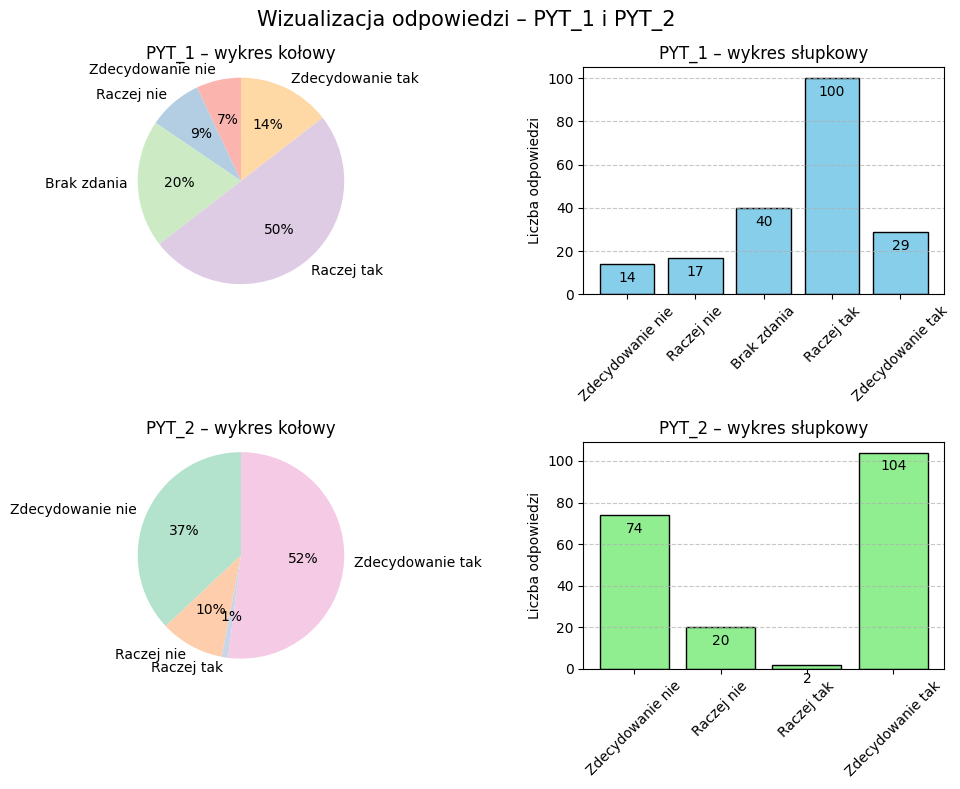

In [157]:
pyt1 = ankieta["PYT_1"].value_counts().sort_index()
pyt2 = ankieta["PYT_2"].value_counts().sort_index()

etykiety = {
    -2: "Zdecydowanie nie",
    -1: "Raczej nie",
     0: "Brak zdania",
     1: "Raczej tak",
     2: "Zdecydowanie tak"
}
pyt1_ind = pyt1.index.map(etykiety)
pyt2_ind = pyt2.index.map(etykiety)

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle("Wizualizacja odpowiedzi – PYT_1 i PYT_2", fontsize=15)

# Wiersz 1 – PYT_1
axs[0, 0].pie(
    pyt1,
    labels=pyt1_ind,
    autopct='%1.0f%%',
    startangle=90,
    colors=plt.cm.Pastel1.colors
)
axs[0, 0].set_title("PYT_1 – wykres kołowy")
axs[0, 0].axis('equal')

bars = axs[0, 1].bar(
    pyt1_ind,
    pyt1.values,
    color='skyblue',
    edgecolor='black'
)
axs[0, 1].set_title("PYT_1 – wykres słupkowy")
axs[0, 1].set_ylabel("Liczba odpowiedzi")
axs[0, 1].tick_params(axis='x', rotation=45)
axs[0, 1].grid(axis='y', linestyle='--', alpha=0.7)
axs[0, 1].bar_label(bars, padding=-15)

# Wiersz 2 – PYT_2
axs[1, 0].pie(
    pyt2,
    labels=pyt2_ind,
    autopct='%1.0f%%',
    startangle=90,
    colors=plt.cm.Pastel2.colors
)
axs[1, 0].set_title("PYT_2 – wykres kołowy")
axs[1, 0].axis('equal')

bars = axs[1, 1].bar(
    pyt2_ind,
    pyt2.values,
    color='lightgreen',
    edgecolor='black'
)
axs[1, 1].set_title("PYT_2 – wykres słupkowy")
axs[1, 1].set_ylabel("Liczba odpowiedzi")
axs[1, 1].tick_params(axis='x', rotation=45)
axs[1, 1].grid(axis='y', linestyle='--', alpha=0.7)
axs[1, 1].bar_label(bars, padding=-15)

plt.tight_layout()
plt.show()

5. Sporządzenie tablic wielodzielczych dla par zmiennych: PYT_1 i DZIAŁ, PYT_1 i STAŻ, PYT_1 i CZY_KIER, PYT_1 i PŁEĆ oraz PYT_1 i WIEK_KAT.   

In [158]:
dzialy = ["DZIAŁ", "STAŻ", "CZY_KIER", "PŁEĆ", "WIEK_KAT"]
for d in dzialy:
    print(pd.crosstab(ankieta["PYT_1"], ankieta[d]), "\n------------------------")

DZIAŁ  HR  IT  MK  PD
PYT_1                
-2      2   0   3   9
-1      2   2   3  10
 0      5   4  14  17
 1     19  15  15  51
 2      3   5  10  11 
------------------------
STAŻ    1   2  3
PYT_1           
-2      5   5  4
-1      6  10  1
 0      8  26  6
 1     19  75  6
 2      3  24  2 
------------------------
CZY_KIER  Nie  Tak
PYT_1             
-2         10    4
-1         14    3
 0         34    6
 1         88   12
 2         27    2 
------------------------
PŁEĆ    K   M
PYT_1        
-2      3  11
-1      7  10
 0     14  26
 1     36  64
 2     11  18 
------------------------
WIEK_KAT  <35  36-45  46-55  >55
PYT_1                           
-2          1     11      2    0
-1          6      7      1    3
 0          3     24      5    8
 1         13     50     25   12
 2          3     12     12    2 
------------------------


6. Sporządzenie tablicy wielodzielczej dla pary zmiennych: PYT_2 i PYT_3.

In [159]:
print(pd.crosstab(ankieta["PYT_2"], ankieta["PYT_3"]))

PYT_3  -2  -1   1   2
PYT_2                
-2     49  16   5   4
-1      3   6  10   1
 1      0   0   2   0
 2      0   8  15  81


7. Utworzenie zmiennej CZY_ZADOW na podstawie zmiennej PYT_2 łącząc kategorie "nie zgadzam się" i "zdecydowanie się nie zgadzam" oraz "zgadzam się" i "zdecydowanie się zgadzam".


In [167]:
ankieta["CZY_ZADOW"] = pd.cut(
    ankieta["PYT_2"],
    bins=[-2.5, 0, 2.5],
    labels=["Niezadowolony", "Zadowolony"],
)
ankieta[["PYT_2", "CZY_ZADOW"]]

,PYT_2,CZY_ZADOW
0,-2,Niezadowolony
1,-2,Niezadowolony
2,2,Zadowolony
3,-2,Niezadowolony
4,2,Zadowolony
...,...,...
195,2,Zadowolony
196,-1,Niezadowolony
197,-2,Niezadowolony
198,2,Zadowolony


8. Sporządzenie wykresów mozaikowych odpowiadających parom zmiennych CZY_ZADOW i odpowiednio jedno z: DZIAŁ, STAŻ, CZY_KIER, PŁEĆ, CZY_ZADOW i WIEK_KAT. 
Czy na podstawie uzyskanych wykresów mozna postawić pewne hipotezy dotycące relacji między powyższymi zmiennymi? ˙
Spróbuj sformułować kilka takich hipotez.

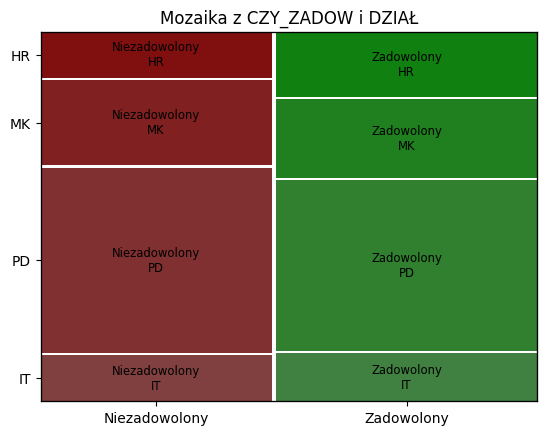

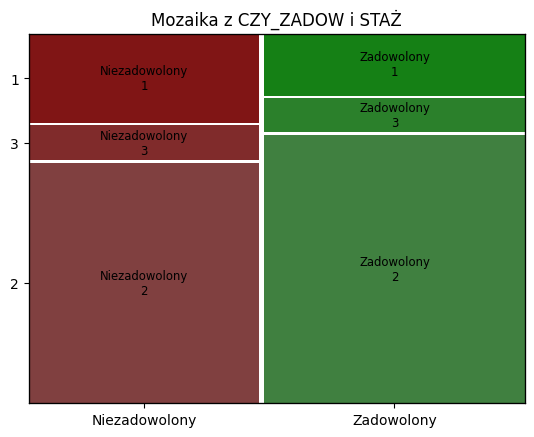

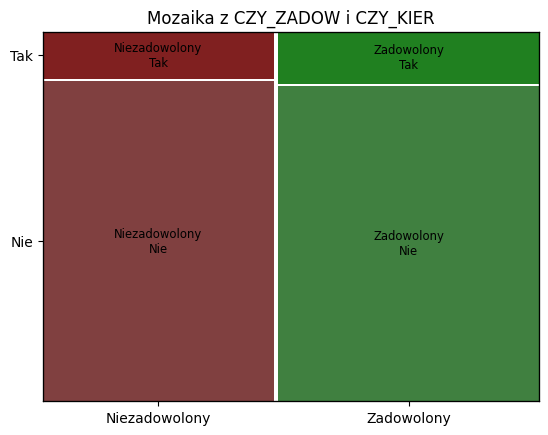

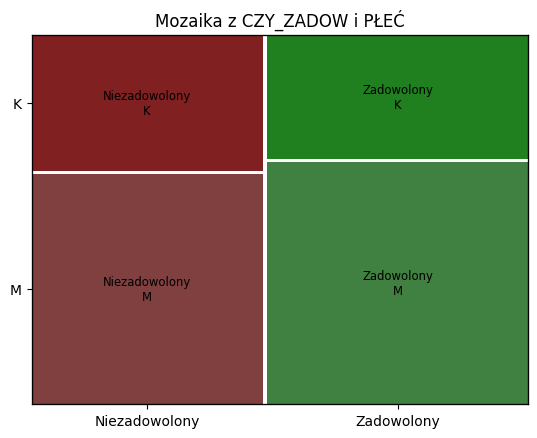

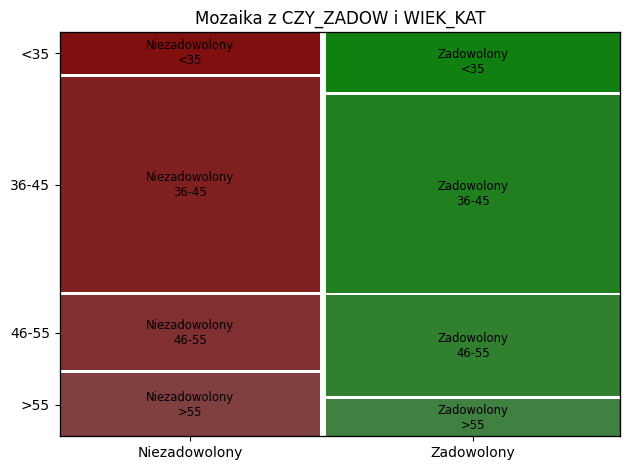

In [168]:
dzialy = ["DZIAŁ", "STAŻ", "CZY_KIER", "PŁEĆ", "WIEK_KAT"]
for i in dzialy:
    mosaic(ankieta, ["CZY_ZADOW", i], title=f'Mozaika z CZY_ZADOW i {i}', gap=0.01)
plt.tight_layout()
plt.show()

## CZĘŚĆ II 
**ZADANIE 2.**

Zilustruj odpowiedzi na pytanie "Jak bardzo zgadzasz się ze stwierdzeniem, że firma pozwala na (...)?" (zmienna PYT_1) w całej badanej grupie oraz w podgrupach ze względu na zmienną CZY_KIER. W tym celu możesz zaproponować własne metody wizualizacji lub zapoznać się z biblioteką Altair lub plot-likert.

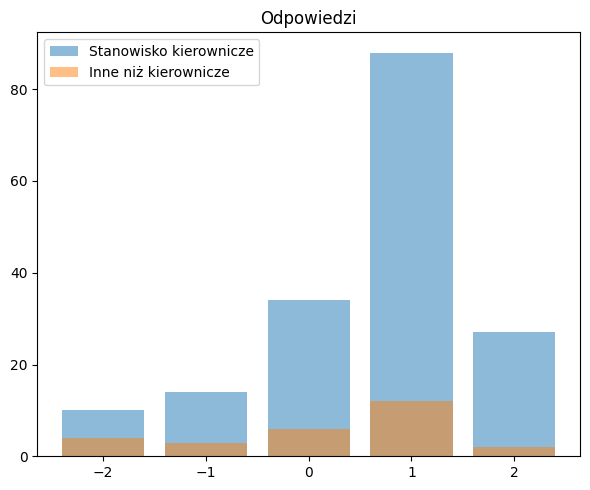

In [182]:
pyt11 = ankieta[ankieta["CZY_KIER"] == "Tak"][["PYT_1", "CZY_KIER"]].value_counts().sort_index()
pyt12 = ankieta[ankieta["CZY_KIER"] == "Nie"][["PYT_1", "CZY_KIER"]].value_counts().sort_index()

plt.figure(figsize=(6,5))
plt.bar(pyt11.index.get_level_values(0), pyt12.values, alpha=0.5, label='Stanowisko kierownicze')
plt.bar(pyt12.index.get_level_values(0), pyt11.values, alpha=0.5, label='Inne niż kierownicze')
plt.title("Odpowiedzi")
plt.legend()
plt.tight_layout()
plt.show()

**ZADANIE 3.**
Przetestuj działanie random.choice albo sample z numpy dla róznych wartości argumentów wejsciowych. Następnie wylosuj próbkę o liczności 10% wszystkich rekordów z pliku "ankieta.csv" w dwóch wersjach: ze zwracaniem oraz bez zwracania.


In [ ]:
sample_size = int(0.1 * len(ankieta)) 

# Losowanie BEZ zwracania (każdy rekord może być wybrany tylko raz)
no_replace = ankieta.sample(n=sample_size, replace=False, random_state=42)

# Losowanie ZE zwracaniem (mogą pojawiać się duplikaty)
with_replace = ankieta.sample(n=sample_size, replace=True, random_state=42)

print("Próbka bez zwracania:\n", no_replace.head(), "\nPróbka ze zwracaniem:\n", with_replace.head())

# ZADANIE 4
Zaproponuj metodę symulowania zmiennych losowych z rozkładu dwumianowego. Napisz funkcję do generowania realizacji, a nast˛epnie zaprezentuj jej działanie porównując wybrane teoretyczne i empiryczne charakterystyki dla przykładowych wartosci paramertów rozkładu: n i p.

In [ ]:
k = 10000


def fu(n, p, k):
    vec = np.zeros(k)  # Wektor wynikowy

    for i in range(k):
        samp = random.choices(
            range(n), k=n
        )  # Losowanie z powtórzeniami (symulacja n prób)
        success = sum(1 for _ in samp if random.random() < p)  # Liczenie sukcesów
        vec[i] = success  # Zapis do wektora

    return vec


print(fu(1000, 1 / 2, k))
print(np.mean(fu(1000, 1 / 2, k)), np.var(fu(1000, 1 / 2, k)))

# ZADANIE 5
Zaproponuj metod˛e symulowania wektorów losowych z rozkładu wielomianowego.
Napisz funkcj˛e do generowania realizacji, a nast˛epnie zaprezentuj jej działanie porównuj ˛ac
wybrane teoretyczne i empiryczne charakterystyki dla przykładowych wartosci paramertów ´
rozkładu: n i p.

In [ ]:
def symuluj_multinomial(n, p, num_samples=10000):
    """
    Generuje realizacje rozkładu wielomianowego.

    :param n: liczba prób w pojedynczej realizacji
    :param p: wektor prawdopodobieństw (musi sumować się do 1)
    :param num_samples: liczba realizacji do wygenerowania
    :return: macierz próbek (num_samples x k)
    """
    k = len(p)  # liczba kategorii
    samples = np.random.multinomial(n, p, size=num_samples)
    return samples


# Przykładowe parametry
n = 10  # liczba prób
p = [0.2, 0.3, 0.5]  # prawdopodobieństwa dla 3 kategorii

# Symulacja
samples = symuluj_multinomial(n, p, num_samples=10000)

# Empiryczna średnia i wariancja
emp_mean = np.mean(samples, axis=0)
emp_var = np.var(samples, axis=0)

# Teoretyczna średnia i wariancja
theo_mean = np.array(n * np.array(p))
theo_var = np.array(n * np.array(p) * (1 - np.array(p)))

print(f"Średnia empiryczna: {emp_mean}")
print(f"Średnia teoretyczna: {theo_mean}")
print(f"Wariancja empiryczna: {emp_var}")
print(f"Wariancja teoretyczna: {theo_var}")

# Wykres histogramu dla każdej kategorii
fig, ax = plt.subplots(len(p), 1, figsize=(8, 6))
for i in range(len(p)):
    ax[i].hist(
        samples[:, i],
        bins=range(n + 2),
        density=True,
        alpha=0.7,
        color="b",
        edgecolor="black",
    )
    ax[i].axvline(
        theo_mean[i], color="r", linestyle="dashed", label="Teoretyczna średnia"
    )
    ax[i].set_title(f"Kategoria {i+1} (p={p[i]})")
    ax[i].legend()
plt.tight_layout()
plt.show()

# Część 3


In [ ]:
fig, ax = plt.subplots(1, 1)
a, b = 1, 10
x = np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 100)
ax.plot(x, beta.pdf(x, a, b), "r-", lw=5, alpha=0.6, label="beta pdf")

In [ ]:
def clopper(confidence, successes=None, trials=None, data=None):
    if data is not None:
        successes = np.sum(data)
        trials = len(data)

    alpha = 1 - confidence
    lower = stats.beta.ppf(alpha / 2, successes, trials - successes + 1)
    upper = stats.beta.ppf(1 - alpha / 2, successes + 1, trials - successes)

    return lower, upper

In [ ]:
print(clopper(0.95, successes=5, trials=10))
data = [1, 0, 1, 1, 0, 1, 0, 1, 1, 0]
print(clopper(0.95, data=data))

In [ ]:
ankieta["CZY_ZADOW"] = pd.cut(ankieta["PYT_2"], bins=[-2.5, 0.5, 2.5], labels=[0, 1])
ankieta["CZY_ZADOW_2"] = pd.cut(ankieta["PYT_3"], bins=[-2.5, 0.5, 2.5], labels=[0, 1])

a = 0.05
data1 = ankieta[["CZY_ZADOW"]].to_numpy()
data2 = ankieta[["CZY_ZADOW_2"]].to_numpy()

print(
    "Przed:",
    clopper(confidence=1 - a, data=data1),
    "\nPo:",
    clopper(confidence=1 - a, data=data2),
)

# zadanie 9. 
Przeprowad´z symulacje, których celem jest porównanie prawdopodobienstwa ´
pokrycia i długosci przedziałów ufno ´ sci Cloppera-Pearsona, Walda i trzeciego dowolnego ´
typu zaimplementowanego w wybranej funkcji. Rozwaz 1 ˙ − α = 0.95, rozmiar próby n ∈
{30,100,1000} i rózne warto ˙ sci prawdopodobie ´ nstwa ´ p. Wyniki umies´c na wykresach i ´
sformułuj wnioski, które dla konkretnych danych ułatwi ˛a wybór konkretenego typu przedziału
ufnosci.
z ´ binomial z biblioteki
random oraz stats.proportion.proportion_confint z biblioteki statsmodels

In [ ]:
def clopper_pearson(x, n, alpha=0.05):
    lower = stats.beta.ppf(alpha / 2, x, n - x + 1)
    upper = stats.beta.ppf(1 - alpha / 2, x + 1, n - x)
    return lower, upper


def wald(x, n, alpha=0.05):
    p_hat = x / n
    se = np.sqrt(p_hat * (1 - p_hat) / n)
    z = stats.norm.ppf(1 - alpha / 2)
    lower = p_hat - z * se
    upper = p_hat + z * se
    return max(0, lower), min(1, upper)


def wilson(x, n, alpha=0.05):
    p_hat = x / n
    z = stats.norm.ppf(1 - alpha / 2)
    denominator = 1 + z**2 / n
    center = (p_hat + z**2 / (2 * n)) / denominator
    margin = z * np.sqrt((p_hat * (1 - p_hat) + z**2 / (4 * n)) / n) / denominator
    return max(0, center - margin), min(1, center + margin)


def simulate(n, p, alpha=0.05, N=500):
    coverage = {"Clopper-Pearson": 0, "Wald": 0, "Wilson": 0}
    lengths = {"Clopper-Pearson": [], "Wald": [], "Wilson": []}

    for _ in range(N):
        x = np.random.binomial(n, p)

        for method, func in zip(
            ["Clopper-Pearson", "Wald", "Wilson"], [clopper_pearson, wald, wilson]
        ):
            lower, upper = func(x, n, alpha)
            if lower <= p <= upper:
                coverage[method] += 1
            lengths[method].append(upper - lower)

    for key in coverage:
        coverage[key] /= N
        lengths[key] = np.mean(lengths[key])

    return coverage, lengths


def run_experiment():
    ns = [30, 100, 1000]
    ps = np.linspace(0.01, 0.89, 10)
    alpha = 0.05
    results = {}

    for n in ns:
        results[n] = {"coverage": {}, "lengths": {}}
        for method in ["Clopper-Pearson", "Wald", "Wilson"]:
            results[n]["coverage"][method] = []
            results[n]["lengths"][method] = []

        for p in ps:
            coverage, lengths = simulate(n, p, alpha)
            for method in coverage:
                results[n]["coverage"][method].append(coverage[method])
                results[n]["lengths"][method].append(lengths[method])

    plot_results(ps, results, ns)


def plot_results(ps, results, ns):
    for n in ns:
        plt.figure(figsize=(5, 5))
        for method in ["Clopper-Pearson", "Wald", "Wilson"]:
            plt.plot(ps, results[n]["coverage"][method], label=f"{method}")
        plt.axhline(0.95, color="black", linestyle="dashed", label="Nominal 95%")
        plt.xlabel("p")
        plt.ylabel("Coverage Probability")
        plt.title(f"Coverage Probability (n={n})")
        plt.legend()
        plt.show()

        plt.figure(figsize=(5, 5))
        for method in ["Clopper-Pearson", "Wald", "Wilson"]:
            plt.plot(ps, results[n]["lengths"][method], label=f"{method}")
        plt.xlabel("p")
        plt.ylabel("Interval Length")
        plt.title(f"Interval Length (n={n})")
        plt.legend()
        plt.show()


run_experiment()

# Część V
Zadanie 11

In [ ]:
def test_proportion(data, column, success_value, p_null, alternative="two-sided"):
    """
    Przeprowadza test dwumianowy dla jednej próby.
    """
    successes = (data[column] == success_value).sum()
    n = len(data[column])
    result = stats.binomtest(successes, n, p_null, alternative=alternative)
    return result.pvalue


def test_proportion_ztest(
    data, column, group_col, group1, group2, success_value, alternative="two-sided"
):
    """
    Przeprowadza test proporcji dla dwóch grup.
    """
    group1_data = data[data[group_col] == group1]
    group2_data = data[data[group_col] == group2]

    successes = [
        (group1_data[column] == success_value).sum(),
        (group2_data[column] == success_value).sum(),
    ]
    counts = [len(group1_data), len(group2_data)]

    stat, pval = proportions_ztest(successes, counts, alternative=alternative)
    return pval


# Przykłady testów dla ankiety
alpha = 0.05
test_results = {}

test_results["1. Kobieta w firmie"] = test_proportion(ankieta, "PŁEĆ", "K", alpha)
test_results["2. Szkolenia przystosowane (pierwszy okres)"] = test_proportion(
    ankieta, "PYT_2", 2, 0.7, alternative="greater"
)
test_results["3. Kobieta vs Mężczyzna na kierowniczym"] = test_proportion_ztest(
    ankieta, "CZY_KIER", "PŁEĆ", "K", "M", "Tak"
)
test_results["4. Kobieta vs Mężczyzna o szkoleniach"] = test_proportion_ztest(
    ankieta, "PYT_2", "PŁEĆ", "K", "M", 2
)
test_results["5. Kobieta vs Mężczyzna w HR"] = test_proportion_ztest(
    ankieta, "DZIAŁ", "PŁEĆ", "K", "M", "HR", alternative="larger"
)

# Wyświetlenie wyników
test_results

In [ ]:
ankieta.head()